In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/20130367/Desktop/DT/DT Projects/Project 4/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.columns =['Sex', 'Length', 'Diameter', 'Height',
                   'Whole weight', 'Shucked weight',
                   'Viscera weight', 'Shell weight', 'Rings']

In [4]:
#Checking for null values

df.isnull().sum(axis=0)

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB



    There are no null values in the data

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Inference:

    Here as we can see the values of the feature "Sex" are missing, this is because "Sex" being a categorical data doesn't 
    have mean or percentiles.
    So we need to convert this categorical data into numeric values
    
    Features: All are numerical continuos values except 'Sex'
    Sex / nominal / -- / M, F, and I (infant)
    Length / continuous / mm / Longest shell measurement
    Diameter / continuous / mm / perpendicular to length
    Height / continuous / mm / with meat in shell
    Whole weight / continuous / grams / whole abalone
    Shucked weight / continuous / grams / weight of meat
    Viscera weight / continuous / grams / gut weight (after bleeding)
    Shell weight / continuous / grams / after being dried
    
    Target: Numerical discreet
    Rings / integer / -- / +1.5 gives the age in years. 

In [7]:
df = pd.get_dummies(df)

In [8]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


    Dataset Analysis: To decide on the best algorithm and the best features to use to train a model on the dataset.
    
    To find out the best features for prediction, we will use a correlation heatmap.It is measure of the degree to which two       variables move in relation to one another. 
    For instance, a positive correlation implies that variable A increases or decreases as B increases or decreases. 
    So we can find out which features are strongly correlated with the one we are trying to predict (target).

<AxesSubplot:>

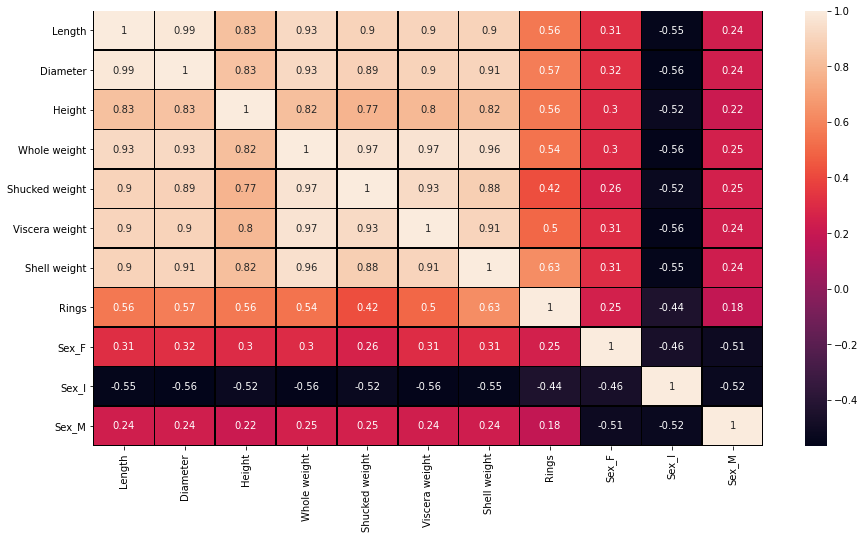

In [9]:
plt.figure(figsize=(15,8))

sns.heatmap(df.corr(),annot = True, linewidth = 0.5, linecolor = "Black")

    Co-relation with Rings: 
    1. Shell Weight
    2. Diameter
    3. Length
    4. Height
    5. Whole Weight
    6. Viscera Weight
    7. Shucked Weight
    8. Sex
    

In [10]:
print(set(df['Rings']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29}


In [11]:
y = df["Rings"]
x = df.drop(columns=['Rings'], axis=1)

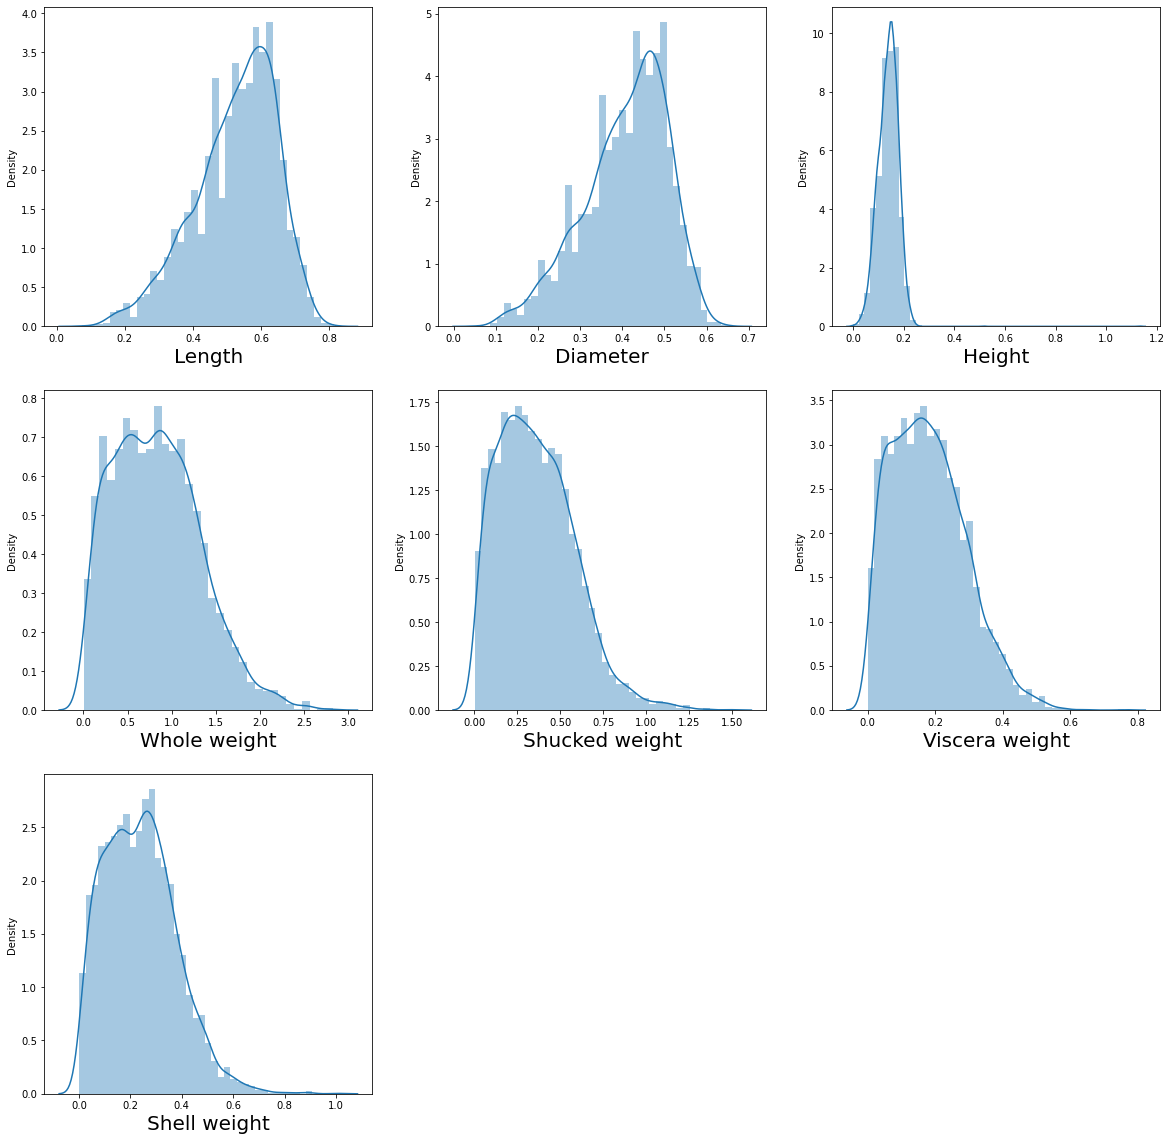

In [12]:
plt.figure(figsize=(20,20))

plotnumber = 1

for column in df:
    if plotnumber <=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber+=1
    
plt.show()

#there is skewness in the data

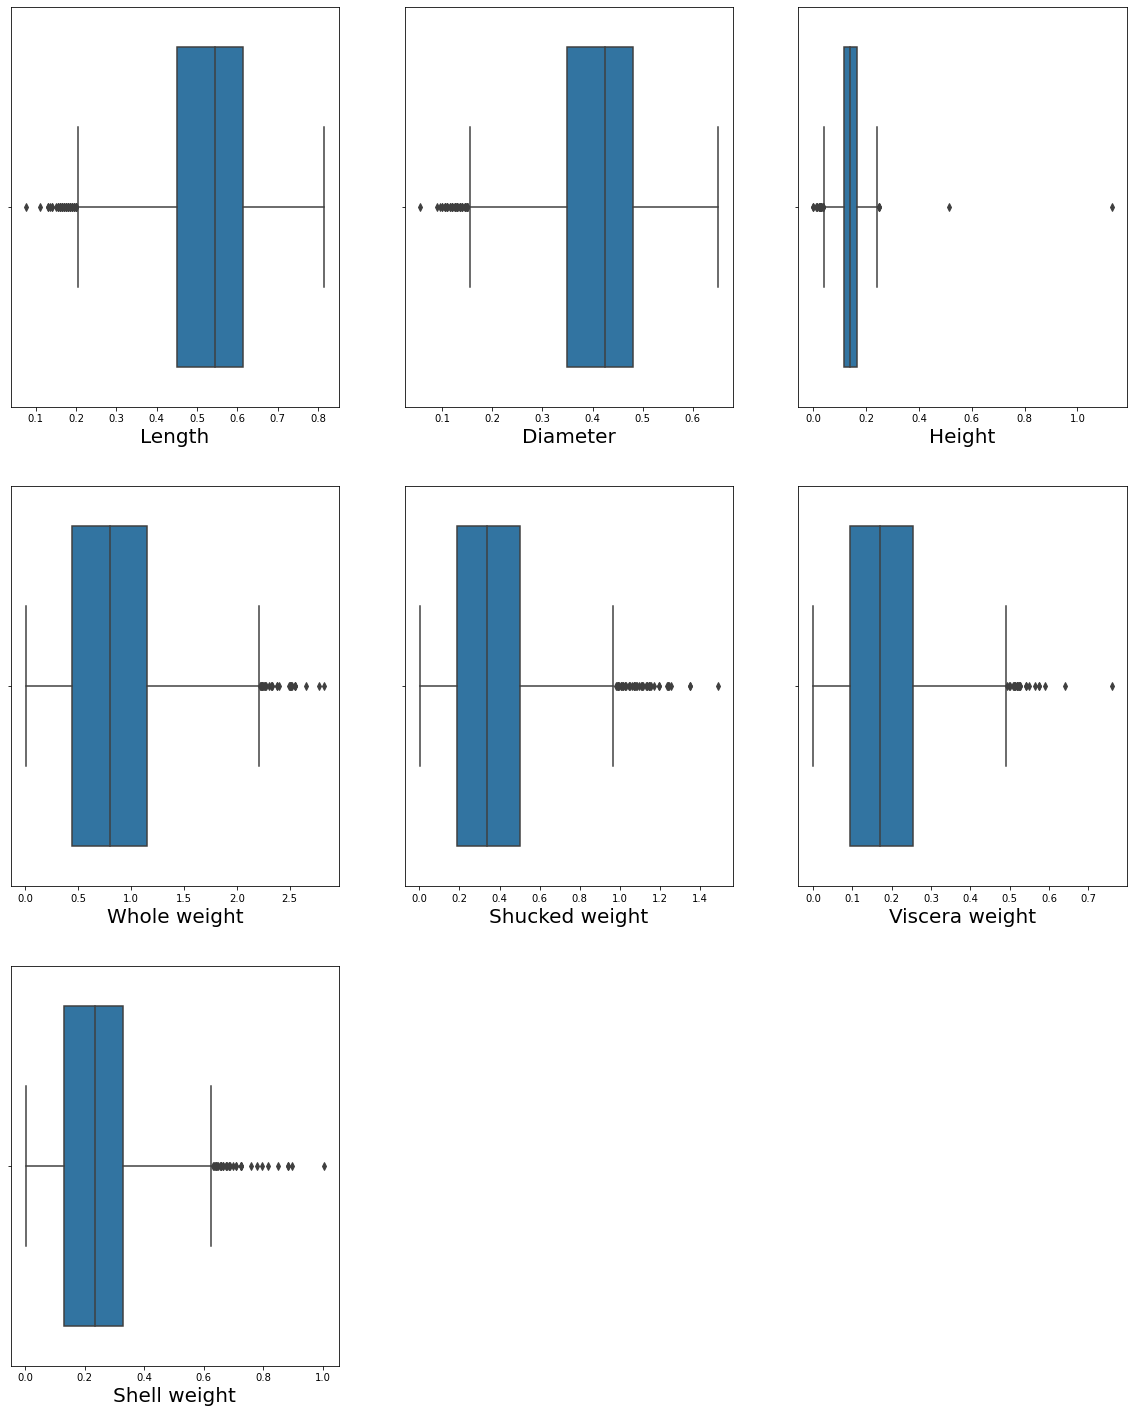

In [13]:
plt.figure(figsize=(20,25))

plotnumber = 1

for column in df:
    if plotnumber <=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber+=1
    
plt.show()

In [ ]:
#height is skewed and has outliers

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# KNN

In [16]:
# k=5
knn = KNeighborsClassifier(n_neighbors=5)

# training 
knn.fit(x_train, y_train)

# Evaluate
print(knn.score(x_test, y_test))

# Changing hyperparameter
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.21291866028708134
0.24641148325358853


# Logistic Regression

In [17]:

logr = LogisticRegression(multi_class = 'ovr', random_state=9)

# training
logr.fit(x_train, y_train)

# Evaluate 
print(logr.score(x_test, y_test))

0.22248803827751196


# Decision Tree

In [18]:
# Initializing 
dt = DecisionTreeClassifier(random_state=0, max_depth = 3)

# training 
dt.fit(x_train, y_train)

# Evaluate 
print(dt.score(x_test, y_test))


0.24401913875598086
